# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Project: Cardio Good Fitness<br>
Background: The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness.
    Task is to Explore the dataset to identify differences between customers of each product. 
    Explore relationships between the different attributes of customers.
    It can be approached from any other line of questioning that seems to be relevant for the business.


## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Objective: Preliminary Data Analysis. 
1. To explore the dataset and extract basic observations about the data.
2. Come up with a customer profile (characteristics of a customer) of the different products
3. Perform uni-variate and multi-variate analyses
4. Generate a set of insights and recommendations that will help the company in targeting new customers.



## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Key Questions:
1. What are the different variables that influence buying of different treadmills?<br>
2. What factors are affecting customers to buy treadmill?<br>
    • How many treadmill models are there in the store?<br>
	• Which Model has the highest sales?<br>
	• Most customers belong to which gender?<br>
	• Does customer's gender have any impact on model they buy?<br>
	• Does customer's Martial status have any impact on model they buy?<br>
    • What is the Age , Income, Education of the customers of each model?<br>
	• What is  the fitness level of customers, miles they run and their weekly treadmill usage?<br>
	• What is the relation between gender, marital status, age, income and education of customers?<br>
	• What is the relation between fitness level, product usage and miles run by customers?<br>
2. What are the recommendations to company management about the best customer profile?  <br>


## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Data Description (CardioGoodFitness.csv)
Attribute Information:
Context - The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables
1. Product - the model no.
2. Age - in no of years, of the customer
3. Gender - of the customer
4. Education - in no. of years, of the customer
5. Marital Status - of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - of the customer
9. Miles- expected to run

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Importing the required libraries:

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Importing the data set

In [3]:
# import the data set
cardio=pd.read_csv("CardioGoodFitness.csv")
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Data set summary:

In [4]:
# check number of rows and columns
cardio.shape

(180, 9)

In [5]:
# Check the names of all variables given in the data set
cardio.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [6]:
# check data summary
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
# Count number of data types variable
cardio.dtypes.value_counts()

int64     6
object    3
dtype: int64

In [8]:
# Check unique values in each variable
cardio.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

### Observations:
1. There are 180 rows and 9 columns <br>
2. There are 9 variables:  'Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', Fitness', 'Income', 'Miles'<br>
3. 6 variables:  'Age', 'Education', 'Usage', Fitness', 'Income', 'Miles', have int data type <br>
4. 3 variables: 'Product',  'Gender', 'MaritalStatus', have object data type.

## Changing the Catagorical variables to Catagory data type

In [9]:
# Make catagorical variable into catagory.
cardio['Product']=cardio.Product.astype('category')
cardio['Gender']=cardio.Gender.astype('category')
cardio['MaritalStatus']=cardio.MaritalStatus.astype('category')
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [10]:
cardio[['Age','Income','Usage','Fitness', 'Miles']].describe()   # descriptive data summary

,Age,Income,Usage,Fitness,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,53719.577778,3.455556,3.311111,103.194444
std,6.943498,16506.684226,1.084797,0.958869,51.863605
min,18.000000,29562.000000,2.000000,1.000000,21.000000
25%,24.000000,44058.750000,3.000000,3.000000,66.000000
50%,26.000000,50596.500000,3.000000,3.000000,94.000000
75%,33.000000,58668.000000,4.000000,4.000000,114.750000
max,50.000000,104581.000000,7.000000,5.000000,360.000000


### Observations:
1.The Age ranges from 18 to 50 , average user age is 28.788<br>
2. Usage scale is from 1 to 5<br>
3. Average Fitness scale of user is 3.311.<br>
4. Income is between 29562 and 104581, there would be positive skewness as upper quartile is below 58668<br>
5. There is a big difference between min miles: 21 and max miles 360. There would be some outliers<br>

# Missing values check

In [11]:
# Missing values check
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(cardio)

,Total,Percent
Miles,0,0.0
Income,0,0.0
Fitness,0,0.0
Usage,0,0.0
MaritalStatus,0,0.0
Education,0,0.0
Gender,0,0.0
Age,0,0.0
Product,0,0.0


#### No missing values are present.

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Measure of Central Tendency

In [12]:
## Mean
print('Mean: \n', cardio.mean())

Mean: 
 Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64


In [13]:
## Median
print('Median: \n', cardio.median())

Median: 
 Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64


In [14]:
## Mode
print('Mode: \n', cardio.mode())

Mode: 
   Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   25   Male         16     Partnered      3        3   45480     85


In [15]:
## Upper and lower quartiles:
print("Lower quantile \n",cardio.quantile(0.25))
print("Upper quantile \n",cardio.quantile(0.75))

Lower quantile 
 Age             24.00
Education       14.00
Usage            3.00
Fitness          3.00
Income       44058.75
Miles           66.00
Name: 0.25, dtype: float64
Upper quantile 
 Age             33.00
Education       16.00
Usage            4.00
Fitness          4.00
Income       58668.00
Miles          114.75
Name: 0.75, dtype: float64


In [16]:
## IQR
print("IQR:  ", cardio.quantile(0.75)-cardio.quantile(0.25))

IQR:   Age              9.00
Education        2.00
Usage            1.00
Fitness          1.00
Income       14609.25
Miles           48.75
dtype: float64


### Observations:
1.Mean Age is closer but bigger than median and mode which are 26 and 25 respectively.<br>
2. Median and modal education of user is 16.<br>
3. Mean user Income 53719.58 is less than median and modal income which are 50596 and 45480. So most users have income between 45000 and 50000.<br>
4. Most users use these machines 3 times in a week and they  rate them average level of fitness i.e. 3.<br>
5.Mean of Miles run, 103.2 is bigger than median 94 and mode 85, which shows positively skewed distribution.

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Measure of Dispersion

In [17]:
#Variance
cardio.var()

Age          4.821217e+01
Education    2.614867e+00
Usage        1.176785e+00
Fitness      9.194289e-01
Income       2.724706e+08
Miles        2.689833e+03
dtype: float64

In [18]:
#Standard deviation
cardio.std()

Age              6.943498
Education        1.617055
Usage            1.084797
Fitness          0.958869
Income       16506.684226
Miles           51.863605
dtype: float64

### Observation: There is a lot of deviation in user income and Miles run

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Skewness of numeric features of data

In [19]:
# Determine the skewness of numeric features of data

In [20]:
numeric_data=cardio.select_dtypes(include=["int64",'float64'])
numeric_data.columns

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

In [21]:
ske_ft=numeric_data.apply(lambda x : skew(x.dropna())).sort_values(ascending=False)
ske_ft

Miles        1.710092
Income       1.280995
Age          0.973957
Usage        0.733318
Education    0.617096
Fitness      0.451001
dtype: float64

#### Miles and Income are highly positively skewed and Age, Usage, Education, fitness are slightly positively skewed features in the dataset. 

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Frequency Table of Product

In [22]:
# Frequency table for Product
m_age= pd.crosstab(index=cardio['Product'], columns='count')
m_age

col_0,count
Product,
TM195,80
TM498,60
TM798,40


In [23]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

### Percentage of Products Sold

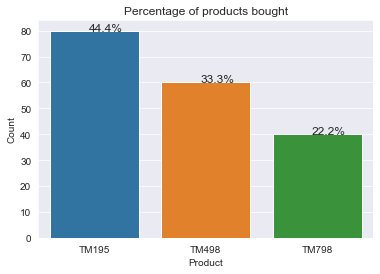

In [24]:
# percentage of products
ax = sns.countplot(cardio['Product'])
plt.title('Percentage of products bought')
plt.xlabel('Product')
plt.ylabel('Count')
bar_perc(ax,cardio['Product'])

### TM195 is bought most by customers as compared to sale of TM498 and sale of TM798 is the lowest.

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Univariate Analysis

## Frequency distribution of Age, Income of users.

### Age

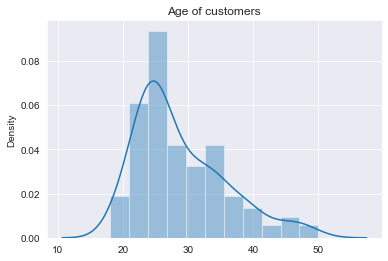

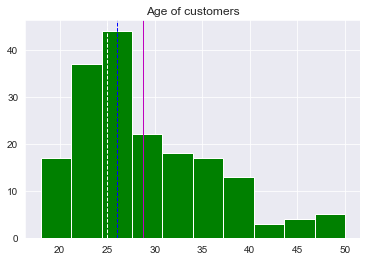

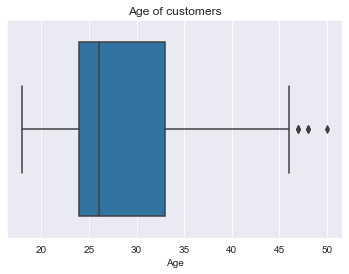

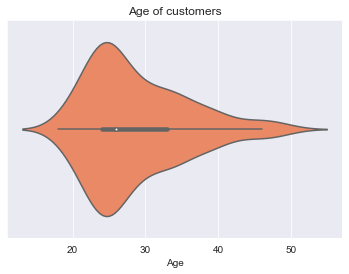

In [25]:
# distribution of age
#fig, axes =plt.subplots(1,3,figsize=(17, 7))
plt.title('Age of customers');
sns.distplot(x=cardio['Age'])
plt.show()
#plt.figure(figsize=(20,10)) # makes the plot wider
plt.title('Age of customers');
plt.hist(cardio['Age'], color='g') # plots a simple histogram
plt.axvline(cardio['Age'].mean(), color='m', linewidth=1)
plt.axvline(cardio['Age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(cardio['Age'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.show()
#plt.figsize=(15,5)
plt.title('Age of customers');
sns.boxplot(data = cardio, x ='Age');
plt.show();
plt.title('Age of customers');
sns.violinplot(data = cardio, x ='Age',color='coral');
plt.show();

### - Observation:
In the above histogram we can see that the third bin with class limits 25 and 28 has the most number of observations. 
- A bulk of the observations lie within the 2nd and 3rd classes. The classes contain above 40 years contain only a very few observations.
- In this case we are measuring Ages of users. We can safely say based on visual observation that most of the users present on the data are less than 28 years.
- There are a very few ages that are more than 40 years.
- There are some outliers above 46 years of Age.
- From the above figure we can see the the mean is represented by the magenta line and the mode by the white line . The median is represented by the blue line.
- We can see from the above figure that the median is lower than mean and that the mode is lower than both.

### Income

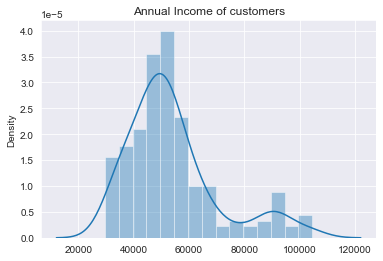

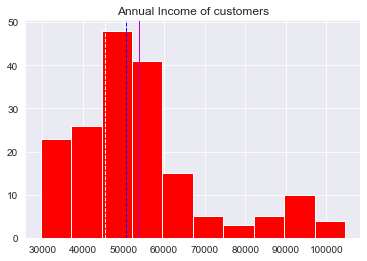

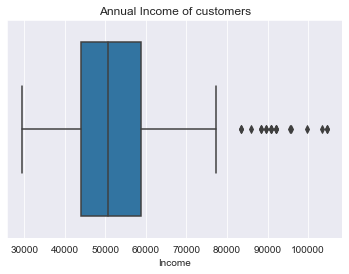

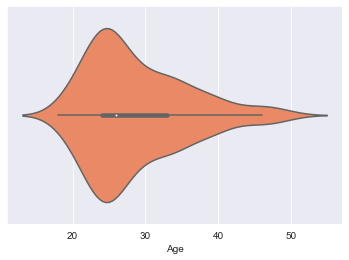

In [26]:
# distribution of income
plt.figsize=(15,5)
plt.title('Annual Income of customers');
sns.distplot(x=cardio['Income'])
plt.show()
#plt.figure(figsize=(15,5)) # makes the plot wider
plt.title('Annual Income of customers');
plt.hist(cardio['Income'], color='r') # plots a simple histogram
plt.axvline(cardio['Income'].mean(), color='m', linewidth=1)
plt.axvline(cardio['Income'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(cardio['Income'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.show();
plt.figsize=(15,5)
plt.title('Annual Income of customers');
sns.boxplot(data = cardio, x ='Income');
plt.show();
sns.violinplot(data = cardio, x ='Age',color='coral');
plt.show();

### - Observation:
In the above histogram we can see that the second bin with class limits (50,  100) has the most number of observations. 
- A bulk of the observations lie within the 45000 -50000 classes. The higher three classes contain only a very few observations.
- In this case we are measuring Income of users. We can safely say based on visual observation that most of the users in the data have 50000 or less income.
- There are a very few users that are more than 70000 income. Once we pass the 70000 point the number of observations drops further.
- There outliers with income more than 82000 are visible on boxplot.
- From the above figure we can see the the mean is represented by the magenta line and the mode by the white line . The median is represented by the blue line.
- We can see from the above figure that the median is lower than mean and that the mode is lower than both.

### Education

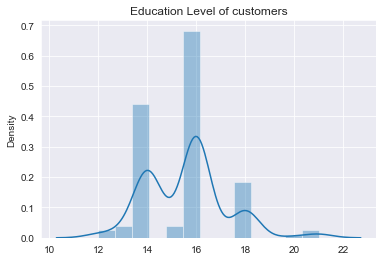

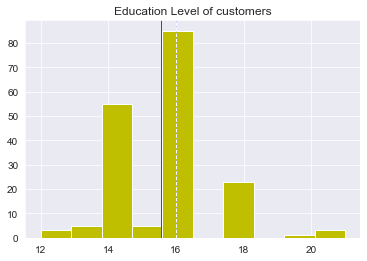

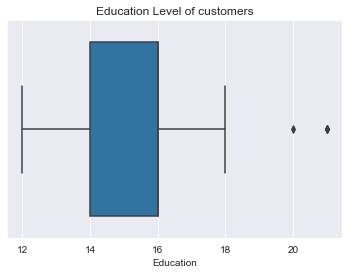

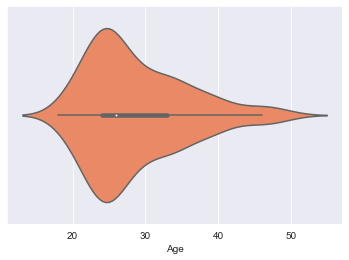

In [27]:
# distribution of Education
plt.figsize=(15,5)
plt.title('Education Level of customers');
sns.distplot(x=cardio['Education'])
plt.show()
plt.title('Education Level of customers');
plt.hist(cardio['Education'], color='y') # plots a simple histogram
plt.axvline(cardio['Education'].mean(), color='m', linewidth=1)
plt.axvline(cardio['Education'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(cardio['Education'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.show()
plt.title('Education Level of customers');
sns.boxplot(data = cardio, x ='Education');
plt.show();
sns.violinplot(data = cardio, x ='Age',color='coral');
plt.show();

### - Observation:
In the above histogram we can see that the second bin with class limits 15 has the most number of observations. 
- A bulk of the observations lie within the 14 and 16 classes and a few in class 18. The other classes contain only a very few observations.
- In this case we are measuring Education of users. We can safely say based on visual observation that most of the users in the data have 14-16 years of Education.
- There are a very few users that have less than 14 and more than 20 years of Education.
- Outliers can be seen at 20 and 21 in the boxplot.
- From the above figure we can see the the mean is represented by the magenta line and the mode by the white line . The median is represented by the blue line.
- We can see from the above figure that the median and mode are both lower than mean.

## Frequency distribution of Usage , Fitness & Miles

### Usage

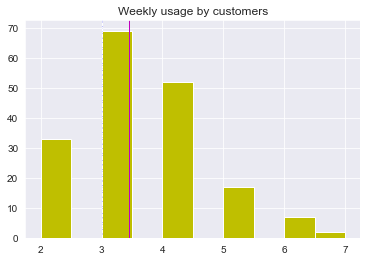

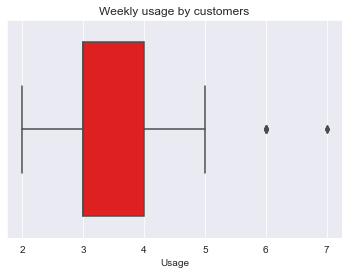

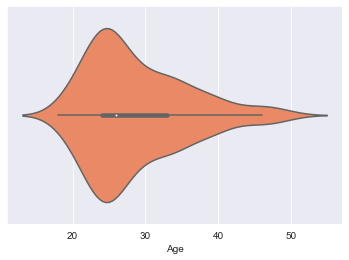

In [28]:
# distribution of Usage
plt.title('Weekly usage by customers');
plt.hist(cardio['Usage'], color='y') # plots a simple histogram
plt.axvline(cardio['Usage'].mean(), color='m', linewidth=1)
plt.axvline(cardio['Usage'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(cardio['Usage'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.show()
plt.title('Weekly usage by customers');
sns.boxplot(data = cardio, x ='Usage', color='r');
plt.show();
sns.violinplot(data = cardio, x ='Age',color='coral');
plt.show();

### - Observation:
In the above histogram we can see that the second bin with class limits 3 has the most number of observations. 
- A bulk of the observations lie within the 2nd and 3rd classes and few in 1st class. 
- In this case we are measuring weekly number of times of machines usage by users. We can safely say based on visual observation that most of the users use machines 3 times a week.
- There are a very few usage that are more than 5 times. Once we pass the 5 point the number of observations drops further.
- In the boxplot also it can be seen there are a few outliers at 6 and 7. 
- From the above figure we can see the the mean is represented by the magenta line and the mode by the white line . The median is represented by the green line.
- We can see from the above figure that the median ,mean and the mode is almost the same i.e. 3
#### Now we have an idea of how the data is distributed.

### Fitness

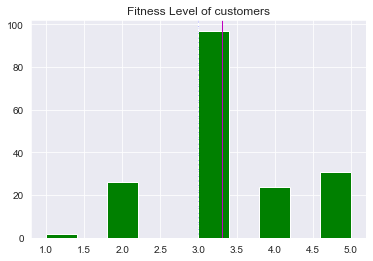

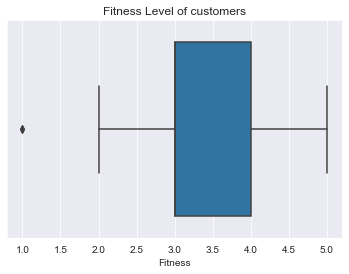

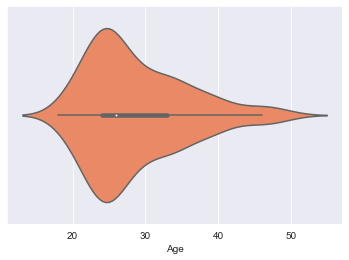

In [29]:
# distribution of Fitness
plt.title('Fitness Level of customers');
plt.hist(cardio['Fitness'], color='g') # plots a simple histogram
plt.axvline(cardio['Fitness'].mean(), color='m', linewidth=1)
plt.axvline(cardio['Fitness'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(cardio['Fitness'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.show();
plt.title('Fitness Level of customers');
sns.boxplot(data = cardio, x ='Fitness');
plt.show();
sns.violinplot(data = cardio, x ='Age',color='coral');
plt.show();

### - Observation:
In the above histogram we can see that the third bin with class limits 3 has the most number of observations i.e. around 94
- Other classes have 30 or less observations. 
- In this case we are measuring self-rated fitness levels by users. We can safely say based on visual observation that most of the users rate themselves 3.
- In the boxplot also it can be seen there are a few outliers at level 1. 
- From the above figure we can see the the mean is represented by the magenta line and the mode by the white line . The median is represented by the green line.
- We can see from the above figure that the median ,mean and the mode is almost the same i.e. 3
#### Now we have an idea of how the data is distributed.

### Miles

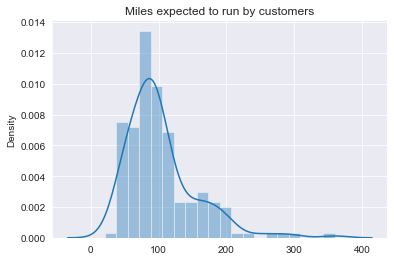

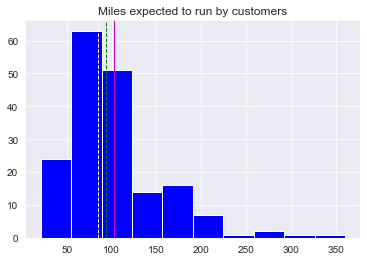

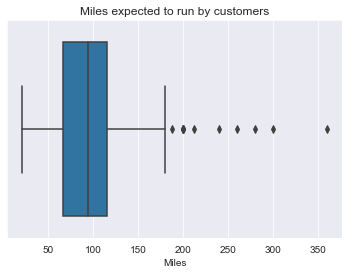

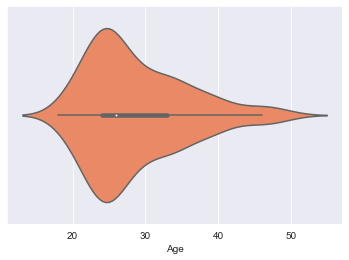

In [30]:
# distribution of miles
plt.title('Miles expected to run by customers');
sns.distplot(x=cardio['Miles'])
plt.show()
plt.title('Miles expected to run by customers');
plt.hist(cardio['Miles'], color='b') # plots a simple histogram
plt.axvline(cardio['Miles'].mean(), color='m', linewidth=1)
plt.axvline(cardio['Miles'].median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(cardio['Miles'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.show()
plt.title('Miles expected to run by customers');
sns.boxplot(data = cardio, x ='Miles');
plt.show();
sns.violinplot(data = cardio, x ='Age',color='coral');
plt.show();

<AxesSubplot:title={'center':'Miles expected to run by customers'}, xlabel='Miles', ylabel='Density'>

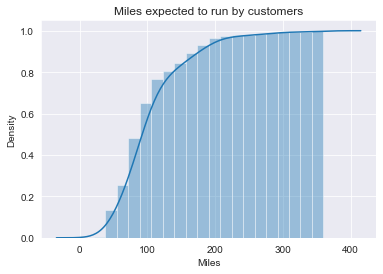

In [31]:
#Cumulative distribution of miles
plt.title('Miles expected to run by customers');
sns.distplot(cardio['Miles'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

### - Observation:
In the above histogram we can see that the second bin with class limits 50-100 has the most number of observations. 
- A bulk of the observations lie within the 50-100 miles classes. The classes 200 miles and above contain only a very few observations.
- In this case we are measuring Miles run by users. We can safely say based on visual observation that most of the users run less than 100 miles.
- There are a very few users that are more than 200 miles. Once we pass the 220 mile point the number of observations drops further.
- Outliers can be seen at 180 miles to 360.
- From the above figure we can see the the mean is represented by the magenta line and the mode by the white line . The median is represented by the blue line.
- We can see from the above figure that the median is lower than mean and that the mode is lower than both.

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Correlation among different factors of data

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


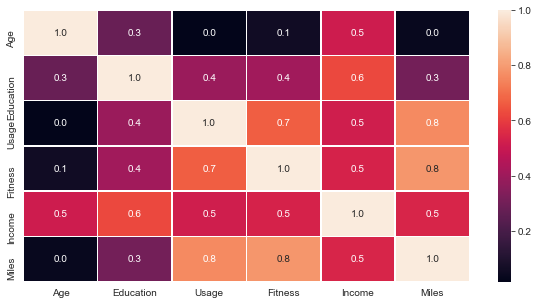

In [32]:
# correlation among all numeric data
print(cardio.corr())
# Heat map to show correlation
plt.figure(figsize=(10,5))
sns.heatmap(cardio.corr(), annot=True,linewidths=.5, fmt= '.1f' )
plt.show()

### Observation:
There is positive correlation between Miles & Usage and Miles & Fitness.<br>
There is no correlation between Age & Usage, between Miles & Age and between Age & Fitness<br>
There is little correlation of income with Education, Age, Usage, Fitness and Miles <br>


# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Bivariate Analysis

### Pairplot of All Numeric Variables

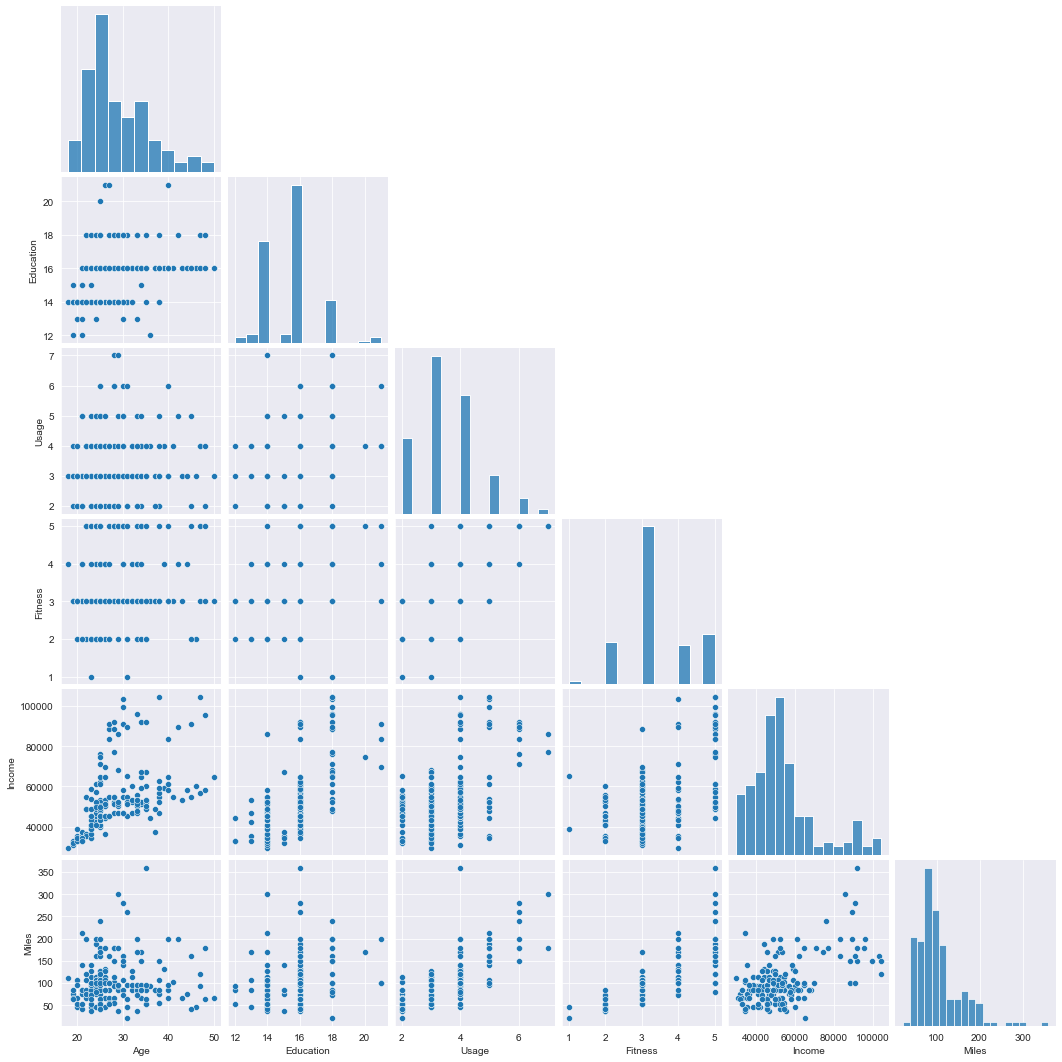

In [33]:
# Pairplot of all numeric variables
sns.pairplot(cardio, corner=True)

### Product relation with other variables

#### Product - Gender

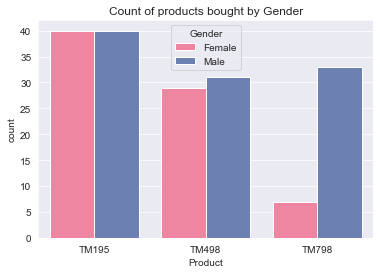

In [34]:
# The relationship between Product and Gender 
plt.title('Count of products bought by Gender');
sns.countplot(cardio['Product'], hue=cardio['Gender'],palette=['#ff759a','#607bbc']);

#### Observations: 
TM195: Most male and female users have this machine, around 40<br>
TM798: 33 Male and 6 female users have this machine<br>
TM498: 31 males and 28 females have this machine<br>

#### Product - Marital Status

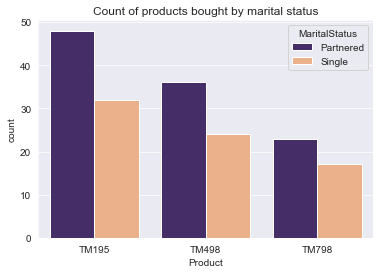

In [35]:
# The relationship between Product and MaritalStatus
plt.title('Count of products bought by marital status');
sns.countplot(cardio['Product'], hue=cardio['MaritalStatus'],palette=['#432371',"#FAAE7B"]);

#### Observations: 
TM195: Most partnered users, 48 have this machine, around 31 Single users have this machine<br>
TM798: 33 partnered 23 Single users have this machine<br>
TM498: 22 partnered and 18 single users have this machine<br>

#### Product - Usage

In [36]:
# Crosstable showing relationship of Product and Usage
pd.crosstab(cardio.Product, cardio.Usage)

Usage,2,3,4,5,6,7
Product,,,,,,
TM195,19,37,22,2,0,0
TM498,14,31,12,3,0,0
TM798,0,1,18,12,7,2


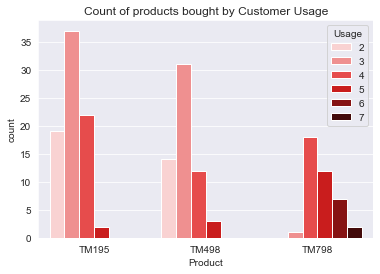

In [37]:
# The relationship between Product and Usage
plt.title('Count of products bought by Customer Usage');
sns.countplot(cardio['Product'], hue=cardio['Usage'],palette=['#ffcccc',"#ff8080",'#ff3333','#e60000','#990000','#4d0000','#000000']);

#### Product - Fitness

In [38]:
# Crosstable showing relationship of Product and Usage
pd.crosstab(cardio.Product, cardio.Fitness)

Fitness,1,2,3,4,5
Product,,,,,
TM195,1,14,54,9,2
TM498,1,12,39,8,0
TM798,0,0,4,7,29


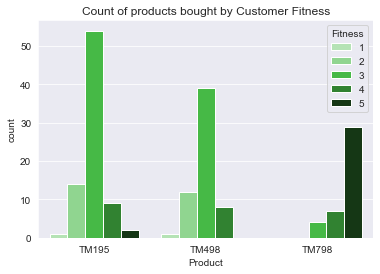

In [39]:
# The relationship between Product and Fitness
plt.title('Count of products bought by Customer Fitness');
sns.countplot(cardio['Product'], hue=cardio['Fitness'],palette=['#adebad',"#85e085",'#33cc33','#248f24','#0f3d0f']);

#### Product - Education

In [40]:
# Frequency distribution of education
m_Edu= pd.crosstab(index=cardio['Education'], columns='count')
m_Edu

col_0,count
Education,
12,3
13,5
14,55
15,5
16,85
18,23
20,1
21,3


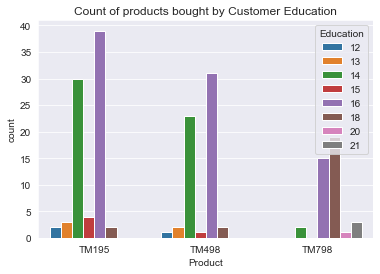

In [41]:
# The relationship between Product and MaritalStatus
plt.title('Count of products bought by Customer Education');
sns.countplot(cardio['Product'], hue=cardio['Education']);

#### Product - Income

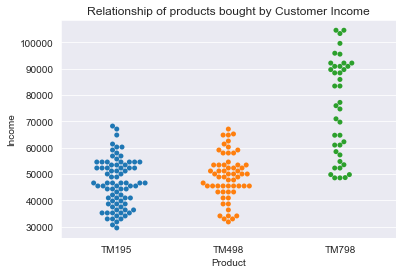

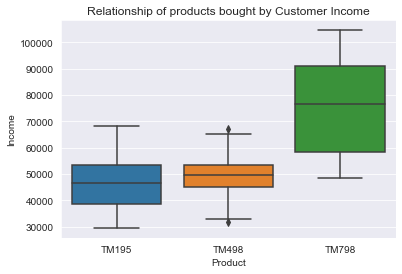

In [42]:
# relationship between product and income
plt.title('Relationship of products bought by Customer Income');
sns.swarmplot(cardio['Product'], cardio['Income'])
plt.show()
plt.title('Relationship of products bought by Customer Income');
sns.boxplot(cardio['Product'], cardio['Income'])
plt.show()

#### Product - Miles

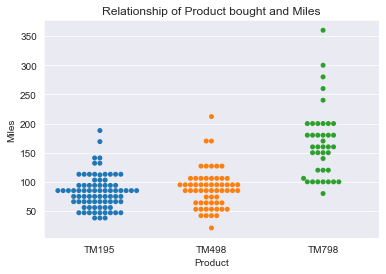

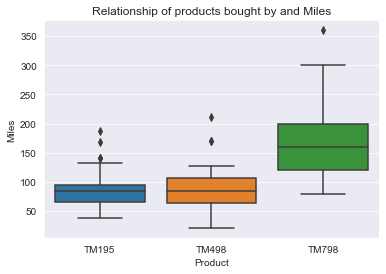

In [43]:
# The relationship between Product and Miles 
plt.title('Relationship of Product bought and Miles');
sns.swarmplot(cardio['Product'],cardio['Miles']);
plt.show();
plt.title('Relationship of products bought by and Miles');
sns.boxplot(cardio['Product'], cardio['Miles'])
plt.show();

#### Product - Age

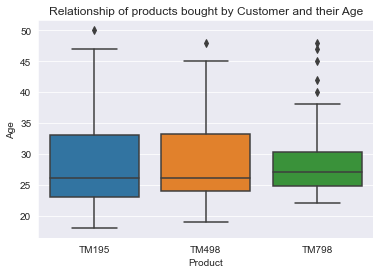

In [44]:
# Relationship between product and customer age
plt.title('Relationship of products bought by Customer and their Age');
sns.boxplot(x=cardio['Product'], y=cardio['Age'])
plt.show()

#### Product - Education

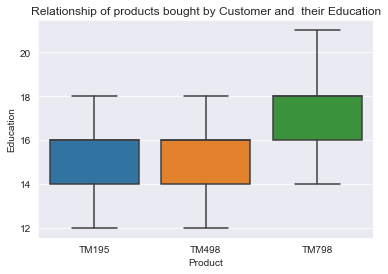

In [45]:
# Relationship between product and customer Education
plt.title('Relationship of products bought by Customer and  their Education');
sns.boxplot(x=cardio['Product'], y=cardio['Education'])
plt.show()

#### Gender- Miles , Marital status-Miles, Fitness-Miles

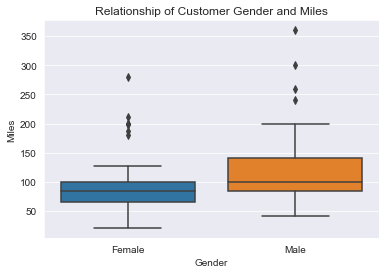

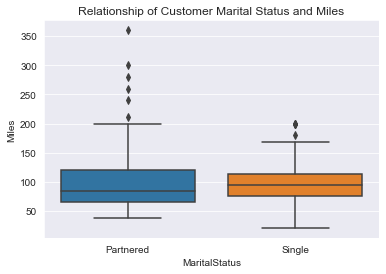

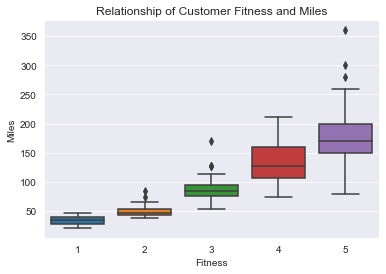

In [46]:

# Relationship between cuatomer gender and customer marital status
plt.title('Relationship of Customer Gender and Miles');
sns.boxplot(cardio['Gender'], cardio['Miles'])
plt.show()
# Relationship between Miles and customer marital status
plt.title('Relationship of Customer Marital Status and Miles');
sns.boxplot(cardio['MaritalStatus'], cardio['Miles'])
plt.show()
# Relationship between Miles and usage
plt.title('Relationship of Customer Fitness and Miles');
sns.boxplot(cardio['Fitness'], cardio['Miles'])
plt.show()

### Income with other variables

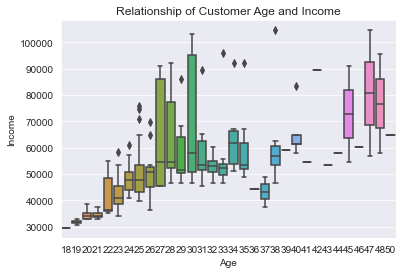

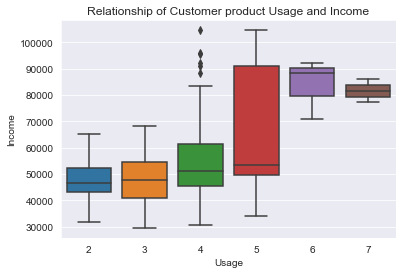

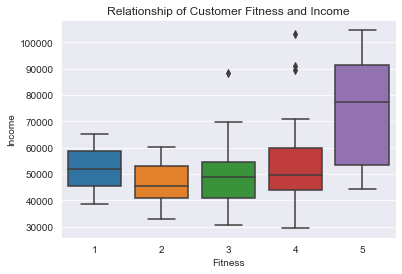

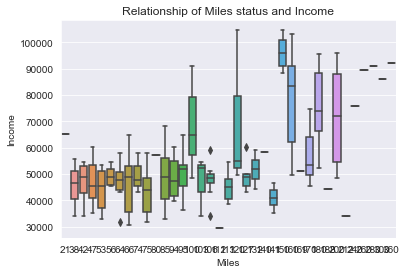

In [47]:
# The relationship between income and Age, Usage, Fitness, Miles
# Income - Age
plt.title('Relationship of Customer Age and Income');
sns.boxplot(x=cardio['Age'], y=cardio['Income'])
plt.show();
# Income - Usage
plt.title('Relationship of Customer product Usage and Income');
sns.boxplot(x=cardio['Usage'], y=cardio['Income'])
plt.show();
# Income - Fitness
plt.title('Relationship of Customer Fitness and Income');
sns.boxplot(x=cardio['Fitness'], y=cardio['Income'])
plt.show()
# Income - Miles
plt.title('Relationship of Miles status and Income');
sns.boxplot(x=cardio['Miles'], y=cardio['Income'])
plt.show()

#### Observations:
-<b><u>Age:</u></b><br>
    Income seems to increase with Age. At age 30 50% people are in income range 50000 - 95000<br>
-<b><u>Usage:</u></b><br>
    High level of income shows more weekly usage.Many outliers are there.<br>
    Low income also has low to moderate usage.<br>
-<b><u>Fitness:</u></b><br>
    Higher income people have more fitness level<br>
    Average income people have moderate usage.  There are some outliers with hith income.

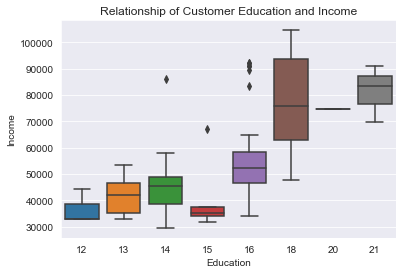

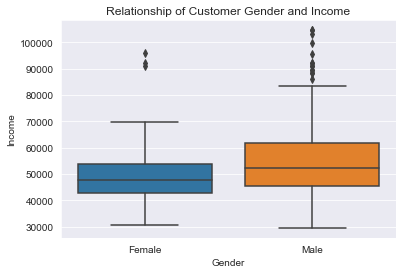

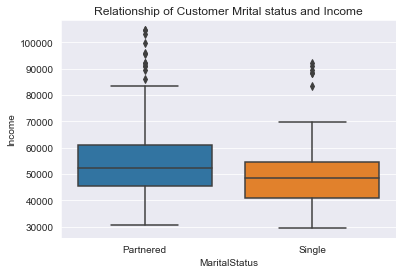

In [48]:
# Relation between Income and Education, Gender, Marital status of customer
#Income - Education
plt.title('Relationship of Customer Education and Income');
sns.boxplot(cardio['Education'], cardio['Income'])
plt.show()
#Income - Gender
plt.title('Relationship of Customer Gender and Income');
sns.boxplot(x=cardio['Gender'], y=cardio['Income'])
plt.show()
#Income - Marital status
plt.title('Relationship of Customer Mrital status and Income');
sns.boxplot(x=cardio['MaritalStatus'], y=cardio['Income'])
plt.show()

#### Observations:
-<b><u>Education:</u></b><br>
    With high Education level 18, 50% customer income is between 63000 and 93000 . There are some outliers in level 16 and 14.<br>
-<b><u>Gender:</u></b><br>
    Males: 50% are in range 45000-62000. Many outliers are there.<br>
    Females:50% are in range 42000-53000. A few outliers with high income.<br>
-<b><u>Marital Status:</u></b><br>
    Partnered:50% lie in range 45000 - 61000. There are many outliers with higher income<br>
    Single: 50% lie in range 40000 - 55000.  There are some outliers with hith income.

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Multivariate Analysis

### Product-wise relation between other variables

#### Product-wise - Usage - Miles

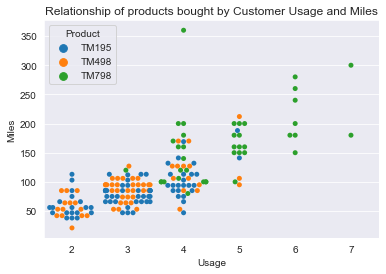

In [49]:
# The relationship between Usage and miles according to product 
plt.title('Relationship of products bought by Customer Usage and Miles');
sns.swarmplot(data=cardio, x='Usage', y='Miles', hue='Product');

### Observations: 
TM195: usage 2-4 times a week, average is 3, from 30-90 miles. There are outliers at 5 times and higher miles.  <br>
TM498: usage 2-4 times a week, average is 3, from 50-100 miles. There are outliers at 5 times and higher miles.  <br>
TM798: usage 4-6 times a week, average is 5, from 100-300 miles. There are outliers at 3 and 7 times and higher miles.  <br>

#### Product-wise - Usage- Income

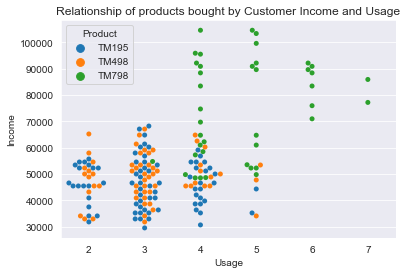

In [50]:
# The relationship between Usage and income according to product 
plt.title('Relationship of products bought by Customer Income and Usage');
sns.swarmplot(data=cardio, x='Usage', y='Income', hue='Product');

### Observations: 
TM195: usage 2-4 times a week, average is 3, income 30000-69000. There are outliers at 5 times usage <br>
TM498: usage 2-4 times a week, average is 3, income 30000-69000. There are outliers at 5 times usage <br>
TM798: usage 4-6 times a week, average is 5,50000-90000. There are outliers at 3 and 7 times and higher income.  <br>

#### Product-wise - Usage- Age

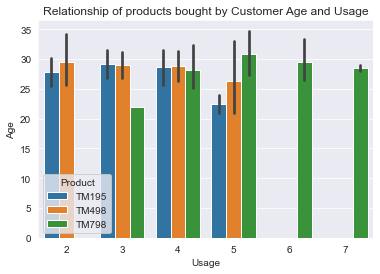

In [51]:
# The relationship between Usage and income according to product 
plt.title('Relationship of products bought by Customer Age and Usage');
sns.barplot(data=cardio, x='Usage', y='Age', hue='Product');

### Observations: 
TM195: usage 2-4 times a week, average is 3, avergae age is 28. <br>
TM498: usage 2-4 times a week, average is 3,average age 29. <br>
TM798: usage 4-6 times a week, average is 5, average age 30. <br>

#### Product-wise - Usage- Fitness

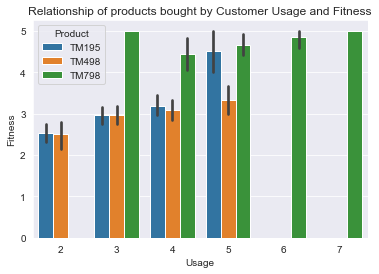

In [52]:
# The relationship between Usage and fitness according to product 
plt.title('Relationship of products bought by Customer Usage and Fitness');
sns.barplot(data=cardio, x='Usage', y='Fitness', hue='Product');

#### Product-wise - Usage- Education

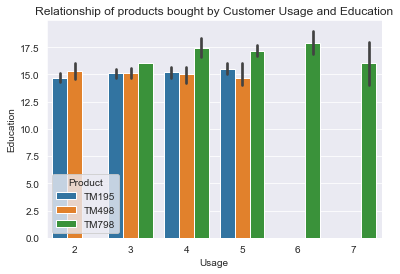

In [53]:
# The relationship between Usage and Education according to product 
plt.title('Relationship of products bought by Customer Usage and Education');
sns.barplot(data=cardio, x='Usage', y='Education', hue='Product');

#### Product-wise - Usage- Gender

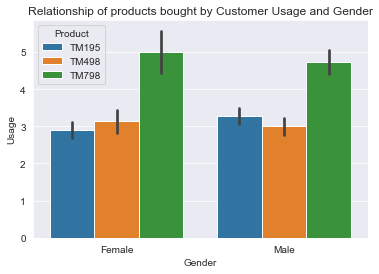

In [54]:
# The relationship between Usage and Gender according to product 
plt.title('Relationship of products bought by Customer Usage and Gender');
sns.barplot(data=cardio, x='Gender', y='Usage', hue='Product');

#### Product-wise - Usage- Marital Status

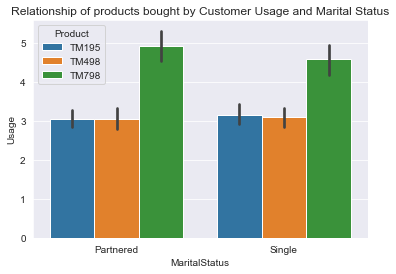

In [55]:
# The relationship between Usage and Gender according to product 
plt.title('Relationship of products bought by Customer Usage and Marital Status');
sns.barplot(data=cardio, x='MaritalStatus', y='Usage', hue='Product');

#### Product-wise - Income- Fitness

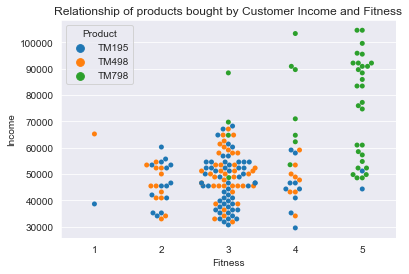

In [56]:
# The relationship between Fitness and income according to product 
plt.title('Relationship of products bought by Customer Income and Fitness');
sns.swarmplot(data=cardio, x='Fitness', y='Income', hue='Product');

#### Product-wise - Age - Miles

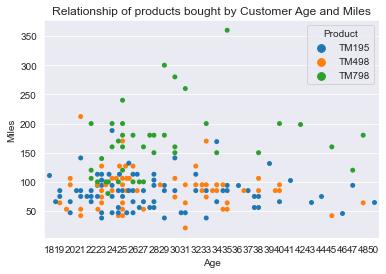

In [57]:
# The relationship between Age and Miles according to product
plt.title('Relationship of products bought by Customer Age and Miles');
sns.swarmplot(data=cardio, x='Age', y='Miles', hue='Product');

#### Observations: 
18-22:Most users, around 18-22 years run less than 100 miles
22-26: Most users, around 22-26 years run aound 100 miles, a few between 150 and 200<br>
32-35: Most users, around 32-36 years run aound 100 miles<br>
40-46: Few users, around 40-46 years run aound 100 miles<br>

#### Product-wise - Age - Income

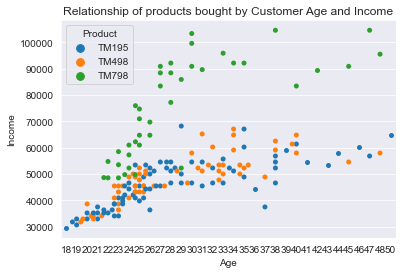

In [58]:
# The relationship between Age and income according to product 
plt.title('Relationship of products bought by Customer Age and Income');
sns.swarmplot(data=cardio, x='Age', y='Income', hue='Product');

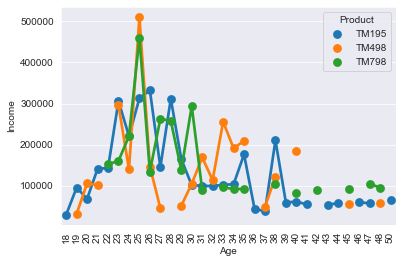

In [77]:
# The Product wise relationship between Age and  Income
sns.pointplot(x='Age', y='Income', hue='Product',data=cardio, estimator=sum, ci=None);
plt.xticks(rotation=90); # To rotate the x axis labls

<AxesSubplot:xlabel='Gender', ylabel='Income'>

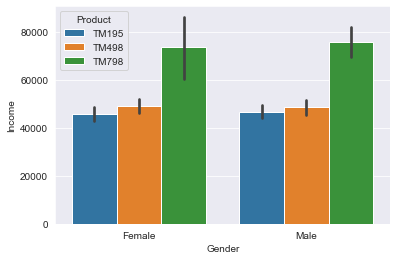

In [99]:
# Relationship between MaritalStatus, Usage and Fitness
sns.barplot(data=cardio, x='Gender', y='Income', hue='Product')

#### Product-wise - Income - Miles

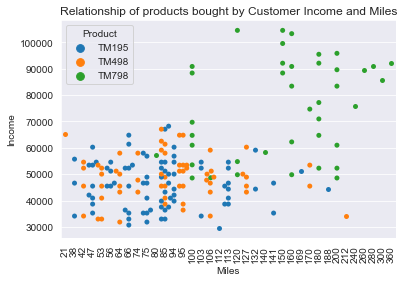

In [59]:
# The relationship between Age and income according to product 
plt.title('Relationship of products bought by Customer Income and Miles');
sns.swarmplot(data=cardio, x='Miles', y='Income', hue='Product');
plt.xticks(rotation=90);

## Observations:
Product vs Miles:<br>
TM789: 50% users run between 200 and 125 miles. median is 160 miles. few outlier at 350 miles.<br>
TM489: 50% users run between 110 and 65 miles. median is 80 miles. few outlier between 170 and 210 miles.<br>
TM195: 50% users run between 100 and 70 miles. median is 80 miles. few outlier between 140 and 200 miles.<br>
Product vs Age:<br>
TM789: 50% users ages are between 25 and 31 years. median is 27. Many outlier at ages 39 to 48.<br>
TM489: 50% users ages are between 24 and 34 years. median is 26. few outliers at 47 years.<br>
TM195: 50% users ages are between 23 and 34 years. median is 26. few outlier at age 50.<br>


#### Age - Income - Gender

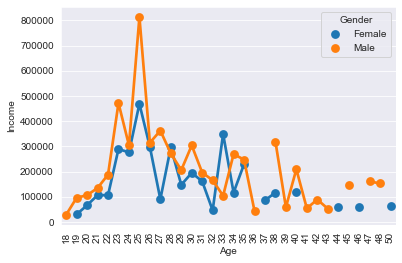

In [75]:
# The Gender wise relationship between Age and  Income
sns.pointplot(x='Age', y='Income', hue='Gender',data=cardio, estimator=sum, ci=None);
plt.xticks(rotation=90); # To rotate the x axis labls

#### Observations: 
Most users, have income between 48000 and 15000 <br>
Highest male at age 25 with income above 80000, looks like an outlier<br>
Lowest male at age 18 has income 0.<br>
Highest Female at age 25 with income above 48000.<br>
Lowest female at age 18 has income 0.<br>

#### Education - Income - Gender

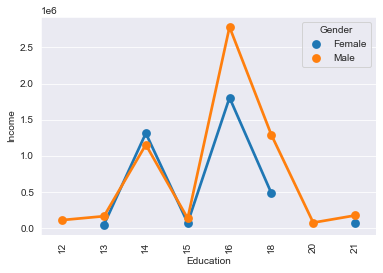

In [76]:
# The Gender wise relationship between Education and  Income
sns.pointplot(x='Education', y='Income', hue='Gender',data=cardio, estimator=sum, ci=None);
plt.xticks(rotation=90); # To rotate the x axis labls

#### Observations: 
Most users, have income between 48000 and 15000 <br>
Highest male at education level 16 has income above 80000, looks like an outlier<br>
Lowest male at education level is 12.<br>
Highest Female at education level 16 income above 48000.<br>
Lowest male at education level is 13.<br>

#### Product  - Gender - Marital status

<AxesSubplot:xlabel='Product'>

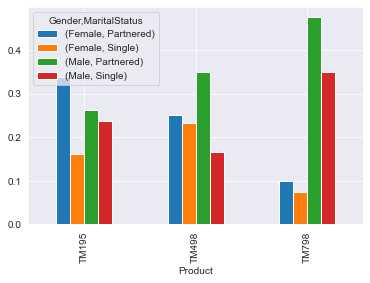

In [78]:
# Relationship between Product and user grouped by gender and marital status
pd.crosstab(cardio.Product,[cardio.Gender, cardio.MaritalStatus], normalize='index').plot.bar(stacked=0)

####  Gender-Usage-Fitness

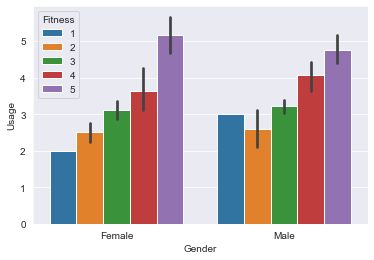

In [91]:
# Relationship between Gender, Usage and Fitness
plt.figsize=(20,10)
sns.barplot(data=cardio, x='Gender', y='Usage', hue='Fitness')
plt.show()

### Observation:
Both Female and Male users who workout more than 5 times consider themselves more fit.
Weekly Usage and fitness level seems to correlate.


#### Product  - Fitness- Marital status

<AxesSubplot:xlabel='MaritalStatus', ylabel='Fitness'>

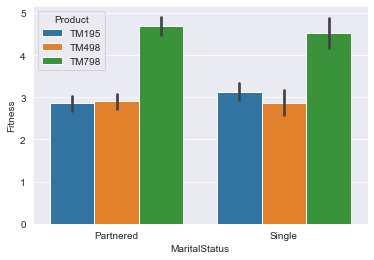

In [98]:
# Relationship between MaritalStatus, Usage and Fitness
sns.barplot(data=cardio, x='MaritalStatus', y='Fitness', hue='Product')

#### Usage- Income- Gender

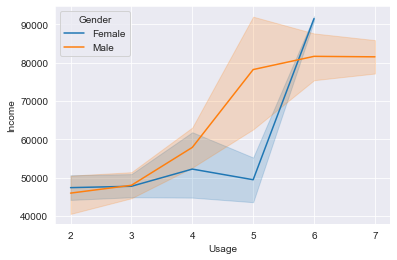

In [101]:
sns.lineplot(x="Usage", y="Income", ci=95, data=cardio, hue='Gender')
plt.ylabel('Income')
plt.xlabel('Usage')
plt.show()

### Observation:
Male users useage of machines seems to icrease with the increase of income.
Female users income does not seem to increase much with usage except for the very high income.

## Product TM195 data

In [60]:
# Taking out only TM195 data
df_195 = cardio[cardio.Product=='TM195']
df_195.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


### Observation:
Average user age is ~28, average income ~46000, average number of days used is 3 , average fitness is 3 and Average miles run is 87.9
50% User ages from 23-33, education 14-16, usage and fitness 3, income 38000-53000

#### Crosstab- Product - Usage, Gender-Fitness of TM195

<AxesSubplot:title={'center':'Relationship of Product:TM195-Usage, Gender-Fitness'}, xlabel='Gender-Fitness', ylabel='Product-Usage'>

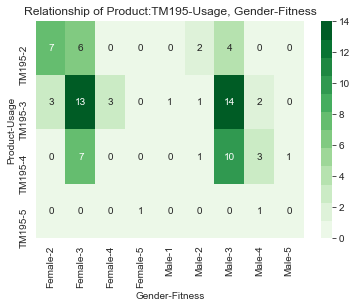

In [61]:
# Relationship between product, usage, gender and fitness of TM195
plt.title('Relationship of Product:TM195-Usage, Gender-Fitness');
colormap=sns.color_palette("Greens",12)
sns.heatmap(pd.crosstab([df_195.Product, df_195.Usage], [df_195.Gender, df_195.Fitness]),
            cmap=colormap, annot=True, cbar=True)

### Observation:
Max number of users are Male users, they use it 3 times a week
Max number of users in females, also use 3 times a week

#### Crosstab- Product - Usage, Marital status-Fitness of TM195

<AxesSubplot:title={'center':'Relationship of Product:TM195-Usage, Marital status- Fitness'}, xlabel='MaritalStatus-Fitness', ylabel='Product-Usage'>

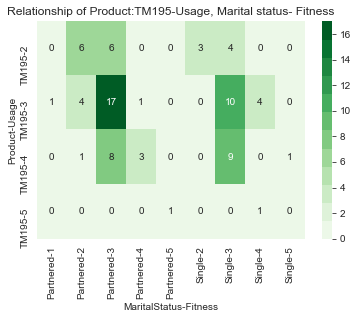

In [62]:
# Relationship between product, usage, gender and fitness of TM195
plt.title('Relationship of Product:TM195-Usage, Marital status- Fitness');
sns.heatmap(pd.crosstab([df_195.Product, df_195.Usage], [df_195.MaritalStatus, df_195.Fitness]),
            cmap=colormap, annot=True, cbar=True)

### Observation:
Max number of users are partnered users, they use it 3 times a week
Max number of users in singles, also use 3 times a week

#### Correlation graph of TM195

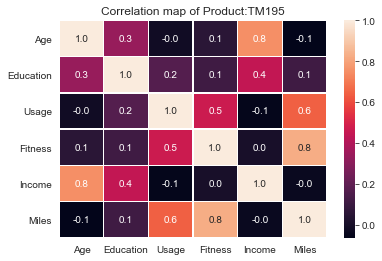

In [63]:
# Heat map to show correlation of only TM195
plt.title('Correlation map of Product:TM195');
sns.heatmap(df_195.corr(), annot=True,linewidths=.5, fmt= '.1f' )
plt.show()

#### Usage-Miles of TM195

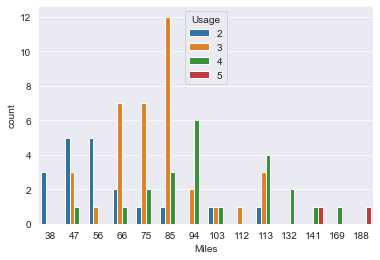

In [64]:
# Miles count of TM195
sns.countplot(df_195['Miles'], hue=df_195['Usage']);

### Observation:
Max number of usage is 85 miles, 3 times a week

## Product TM498 data

In [65]:
# Taking out only TM498 data
df_498 = cardio[cardio.Product=='TM498']
df_498.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


### Observation:
Average user age is ~29, average income ~49000, average number of days used is 3 , average fitness is 3 and Average miles run is 87.9
50% User ages from 24-33, education 14-16, usage and fitness 3, income 45000-53000

#### Crosstab- Product - Usage, Gender-Fitness of TM498

<AxesSubplot:title={'center':'Relationship of Product:TM498-Usage, Gender-Fitness'}, xlabel='Gender-Fitness', ylabel='Product-Usage'>

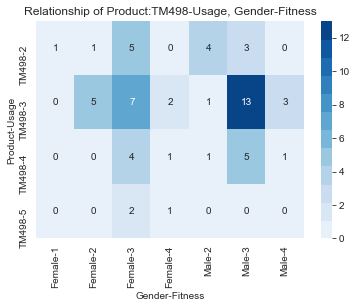

In [66]:
# Relationship between product, usage, gender and fitness of TM498
plt.title('Relationship of Product:TM498-Usage, Gender-Fitness');
colormap2=sns.color_palette("Blues",12)
sns.heatmap(pd.crosstab([df_498.Product, df_498.Usage], [df_498.Gender, df_498.Fitness]),
            cmap=colormap2, annot=True, cbar=True)

### Observation:
Max number of users are Male users, they use it 3 times a week
Max number of users in females, also use 3 times a week

#### Crosstab- Product - Usage, Marital status-Fitness of TM498

<AxesSubplot:title={'center':'Relationship of Product:TM498-Usage, Marital status-Fitness'}, xlabel='MaritalStatus-Fitness', ylabel='Product-Usage'>

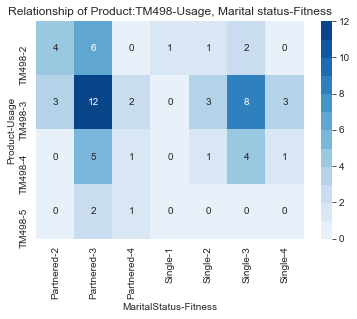

In [67]:
# Relationship between product, usage, gender and fitness of TM498
plt.title('Relationship of Product:TM498-Usage, Marital status-Fitness');
sns.heatmap(pd.crosstab([df_498.Product, df_498.Usage], [df_498.MaritalStatus, df_498.Fitness]), cmap=colormap2, annot=True, cbar=True)

### Observation:
Max number of users are partnered users, they use it 3 times a week, Fitness:3
Max number of users in singles, also use 3 times a week Fitness:3

#### Correlation map of TM498

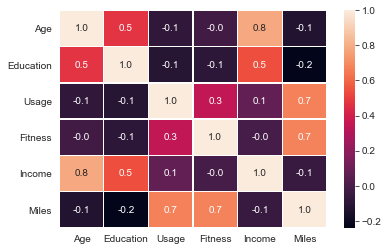

In [68]:
# Heat map to show correlation
sns.heatmap(df_498.corr(), annot=True,linewidths=.5, fmt= '.1f' )
plt.show()

#### Usage - Miles of TM498

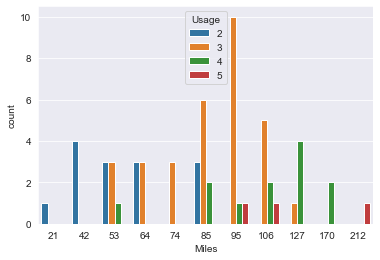

In [69]:
# Miles count of TM498
sns.countplot(df_498['Miles'], hue=df_498['Usage']);

### Observation:
Max number of usage is 95 miles, 3 times a week

## Product TM798 data

In [70]:
# Taking out only TM798
df_798 = cardio[cardio.Product=='TM798']
df_798.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


### Observation:
Average user age is ~29, average income ~75000, average number of days used is ~5 , average fitness is ~4 and Average miles run is ~167
50% User ages from 25-30, education 16-18, usage and fitness both 4-5, income 58000-91000

#### Crosstab- Product - Usage, Gender-Fitness of TM798

<AxesSubplot:title={'center':'Relationship of Product:TM798-Usage, Gender-Fitness'}, xlabel='Gender-Fitness', ylabel='Product-Usage'>

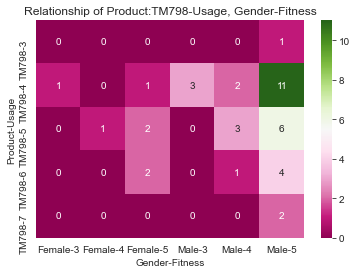

In [71]:
# Relationship between product, usage, gender and fitness of TM798
plt.title('Relationship of Product:TM798-Usage, Gender-Fitness');
sns.heatmap(pd.crosstab([df_798.Product, df_798.Usage], [df_798.Gender, df_798.Fitness]),
            cmap="PiYG", annot=True, cbar=True)

### Observation:
Max number of users are Male users with fitness: 5, they use it 4 times a week
Max number of users in females with fitness 5, also use 5-6 times a week

#### Crosstab- Product - Usage, Marital Status-Fitness of TM798

<AxesSubplot:title={'center':'Relationship of Product:TM798-Usage, Marital status-Fitness'}, xlabel='MaritalStatus-Fitness', ylabel='Product-Usage'>

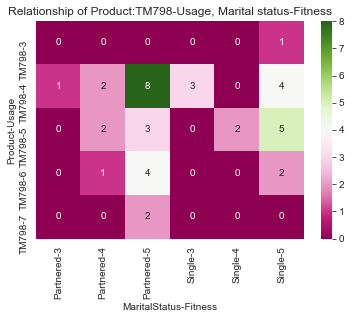

In [72]:
# Relationship between product, usage, gender and fitness of TM798
plt.title('Relationship of Product:TM798-Usage, Marital status-Fitness');
sns.heatmap(pd.crosstab([df_798.Product, df_798.Usage], [df_798.MaritalStatus, df_798.Fitness]),
            cmap="PiYG", annot=True, cbar=True)

### Observation:
Max number of users are partnered users, they use it 4 times a week, Fitness:5
Max number of users in singles, also use 5 times a week Fitness:5

#### Correlation map of TM798

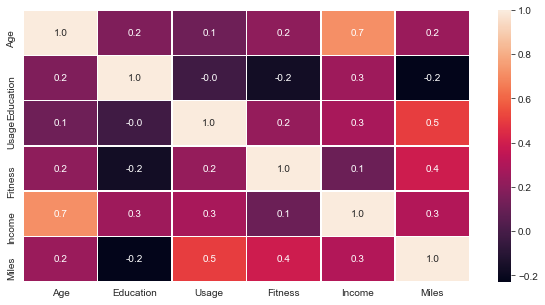

In [73]:
# Heat map to show correlation between factors of TM798
plt.figure(figsize=(10,5))
sns.heatmap(df_798.corr(), annot=True,linewidths=.5, fmt= '.1f' )
plt.show()

#### Usage-Miles of TM798

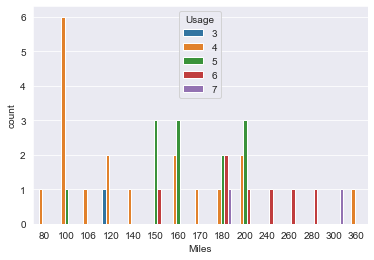

In [74]:
# Miles count of TM798
sns.countplot(df_798['Miles'], hue=df_798['Usage']);

### Observation:
Max number of usage is 100 miles, 4 times a week

#### Crosstab of Product - Education

In [79]:
# Relationship between Product and user education
pd.crosstab(cardio.Product,cardio.Education).T

Product,TM195,TM498,TM798
Education,,,
12,2,1,0
13,3,2,0
14,30,23,2
15,4,1,0
16,39,31,15
18,2,2,19
20,0,0,1
21,0,0,3


#### Crosstab of Product - Gender-Usage

<Figure size 400x300 with 0 Axes>

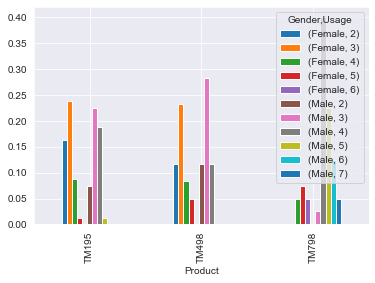

In [80]:
# the dpi of my monitor is 120
my_dpi=120
# make a figure with the follwing figsize
plt.figure(figsize=(400/my_dpi, 300/my_dpi), dpi=my_dpi)
pd.crosstab(cardio.Product,[cardio.Gender, cardio.Usage], normalize='index').plot.bar(align='center',stacked=0)
plt.show()

#### Crosstab of Product -Usage,  Gender-Education

In [81]:
# Relationship between Product , usage and user grouped by gender and Education
pd.crosstab([cardio.Product,cardio.Usage],[cardio.Gender, cardio.Education]).T

Product          TM195           TM498          TM798            
Usage                2   3  4  5     2  3  4  5     3  4  5  6  7
Gender Education                                                 
Female 13            0   0  0  0     0  0  1  0     0  0  0  0  0
       14            7  10  1  0     3  7  0  2     0  0  0  0  0
       15            2   0  0  0     0  0  0  0     0  0  0  0  0
       16            4   8  6  1     3  6  4  1     0  0  1  1  0
       18            0   1  0  0     1  1  0  0     0  1  2  1  0
       21            0   0  0  0     0  0  0  0     0  1  0  0  0
Male   12            0   1  1  0     1  0  0  0     0  0  0  0  0
       13            0   2  1  0     0  0  1  0     0  0  0  0  0
       14            4   4  4  0     1  7  3  0     0  1  0  0  1
       15            1   0  0  1     0  1  0  0     0  0  0  0  0
       16            1  10  9  0     5  9  3  0     1  7  4  1  0
       18            0   1  0  0     0  0  0  0     0  6  5  3  1
       20            0   0  0  0     0  0  0  0     0  1  0  0  0
       21            0   0  0  0     0  0  0  0     0  1  0  1  0

### Observations:<br>
TM195: Most male users have 16 years of education and use it 3 times weekly. Most Female users have 14 years of education and use it 3 times weekly. <br>
TM498: Most male users have 16 years of education and use it 3 times weekly. Most Female users have 16 years of education and use it 3 times weekly.<br>
TM798: Most male users have 18 years of education and use it 5 times weekly. Most Female users have 18 years of education and use it 5 times weekly.<br>

<AxesSubplot:xlabel='Gender-Education', ylabel='Product-Usage'>

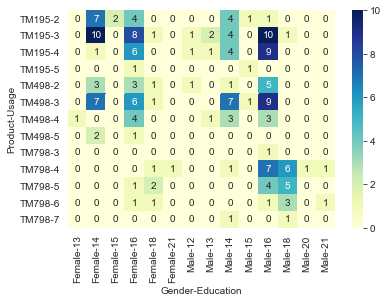

In [82]:
sns.heatmap(pd.crosstab([cardio.Product, cardio.Usage], [cardio.Gender, cardio.Education]),
            cmap="YlGnBu", annot=True, cbar=True)

#### Crosstab of Product -Usage,  Gender-Fitness

In [83]:
# Relationship between Product , usage and user grouped by gender and Education
pd.crosstab([cardio.Product,cardio.Usage],[cardio.Gender, cardio.Fitness]).T

Product        TM195            TM498           TM798             
Usage              2   3   4  5     2   3  4  5     3   4  5  6  7
Gender Fitness                                                    
Female 1           0   0   0  0     1   0  0  0     0   0  0  0  0
       2           7   3   0  0     1   5  0  0     0   0  0  0  0
       3           6  13   7  0     5   7  4  2     0   1  0  0  0
       4           0   3   0  0     0   2  1  1     0   0  1  0  0
       5           0   0   0  1     0   0  0  0     0   1  2  2  0
Male   1           0   1   0  0     0   0  0  0     0   0  0  0  0
       2           2   1   1  0     4   1  1  0     0   0  0  0  0
       3           4  14  10  0     3  13  5  0     0   3  0  0  0
       4           0   2   3  1     0   3  1  0     0   2  3  1  0
       5           0   0   1  0     0   0  0  0     1  11  6  4  2

<AxesSubplot:xlabel='Gender-Fitness', ylabel='Product-Usage'>

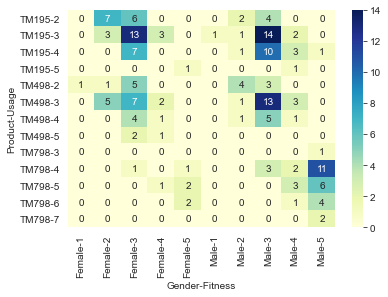

In [84]:
sns.heatmap(pd.crosstab([cardio.Product, cardio.Usage], [cardio.Gender, cardio.Fitness]),
            cmap="YlGnBu", annot=True, cbar=True)

### Observation
TM195: Most Female users use it 3 times weekly and have fitness level of 3. Most Male users use it 3 times weekly and have fitness level of 3.
TM498:Most Female users use it 3 times weekly and have fitness level of 3. Most Male users use it 3 times weekly and have fitness level of 3.
TM798: Most Male users use it 4 times weekly and have fitness level of 5.    

#### Crosstab of Product -Usage,  Gender-Marital status

In [85]:
# Relationship between Product , usage and user grouped by gender and Marital status
pd.crosstab([cardio.Product,cardio.Usage],[cardio.Gender, cardio.MaritalStatus]).T

Product              TM195           TM498           TM798             
Usage                    2   3  4  5     2   3  4  5     3   4  5  6  7
Gender MaritalStatus                                                   
Female Partnered         9  14  3  1     4   5  3  3     0   1  1  2  0
       Single            4   5  4  0     3   9  2  0     0   1  2  0  0
Male   Partnered         3   9  9  0     6  12  3  0     0  10  4  3  2
       Single            3   9  6  1     1   5  4  0     1   6  5  2  0

<AxesSubplot:xlabel='Gender-MaritalStatus', ylabel='Product-Usage'>

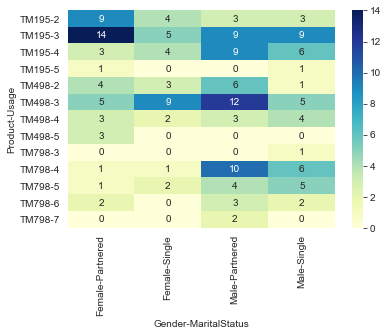

In [86]:
sns.heatmap(pd.crosstab([cardio.Product, cardio.Usage], [cardio.Gender, cardio.MaritalStatus]),
            cmap="YlGnBu", annot=True, cbar=True)

### Observations: 
TM195: Most users are partnered females who use it 3 times weekly
TM498: Most users are partnered males who use it 3 times weekly
TM798: Most users are partnered males who use it 4 times weekly

#### Means of numeric data according to product

In [87]:
pd.pivot_table(cardio, values=None, index='Product', columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=True) 

,Age,Education,Fitness,Income,Miles,Usage
Product,,,,,,
TM195,28.55,15.037500,2.9625,46418.025,82.787500,3.087500
TM498,28.90,15.116667,2.9000,48973.650,87.933333,3.066667
TM798,29.10,17.325000,4.6250,75441.575,166.900000,4.775000


#### Means of income according to product

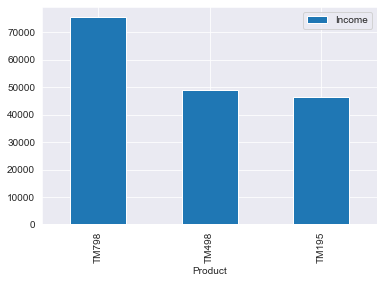

In [95]:
# Relationship between Product and Income
cardio.groupby(by=['Product'])['Income'].mean().reset_index().sort_values(['Income'], ascending=False).head(10).plot(x='Product',y='Income',
                                                                                                           kind='bar')
plt.title='Product vs Income'

### Observation:
Product TM798 is bought by users with higher income, average income 75000. Product TM498 is bought by users with average income 49000 and T195 is bought by users with income 46000. 

#### Means of Miles according to product

<AxesSubplot:xlabel='Product'>

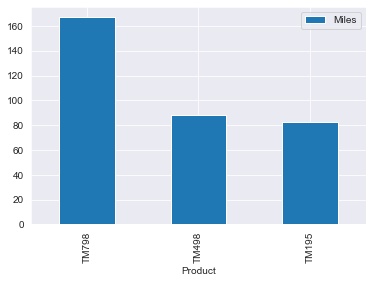

In [96]:
# Relationship between Product and Miles
cardio.groupby(by=['Product'])['Miles'].mean().reset_index().sort_values(['Miles'], ascending=False).head(10).plot(x='Product',y='Miles',
                                                                                                           kind='bar')

### Observation:
Product TM798 is run by users, more than 167 average miles. Product TM498 is run by users with 88 average miles and T195 is run by users with 82 average miles.

<AxesSubplot:xlabel='Education'>

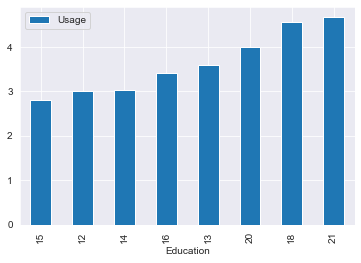

In [97]:
cardio.groupby(by=['Education'])['Usage'].mean().reset_index().sort_values(['Usage']).tail(10).plot(x='Education',y='Usage',
                                                                                                           kind='bar')

### Observation:
Users with Higher Education do seem to workout more often in a week. Most users have higher education

### Conclusion:
1. Customers who are married, have less buying power and average level of fitness seem to prefer TM195.<br>
2. Customers who have moderate buying power and average level of fitness seem to prefer TM498.<br>
3. Mostly male customers, have high buying power and high level of fitness seem to buy TM798.<br>
<b>Ideal Customer Profile</b><br>
<b>TM195:</b> Young male and female married customers(23-33)<br>
Bachelor/masters<br>
 With less buying power 38K-53K<br>
Workout in moderation: 3<br>
Moderate fitness level.: 3<br>
<b>TM498:</b>Young males and  females (23-33)<br>
With moderate buying power.45K-53K<br>
Workout in moderation: 3<br>
Moderate fitness level.: 3<br>
<b>TM798:</b>Young Males  (25-30)<br>
With high buying power:58K-91K<br>
Excessive workout: 4-5<br>
High fitness level.: 5<br>
